<a href="https://colab.research.google.com/github/mohsin-code/Deep-Learning/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [5]:
import os 
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


from google.colab.patches import cv2_imshow

In [6]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# Colab GPU

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Mounted at /content/drive
Gen RAM Free: 12.3 GB  | Proc size: 958.8 MB
GPU RAM Free: 14887MB | Used: 222MB | Util   1% | Total 15109MB


In [11]:
i=int(1)

data_dir = '/content/drive/MyDrive/AI/flowers'

categories = ['daisy','dandelion','rose','sunflower','tulip']
data = []

def make_data():
  for category in categories:
    global i 
    print(i)
    i=i+1;
    path = os.path.join(data_dir,category)
    label = categories.index(category)
    for img_name in os.listdir(path):
      image_path = os.path.join(path,img_name)
      image = cv2.imread(image_path)
      try:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))
        image = np.array(image,dtype=np.float32)
        data.append([image,label])
      except Exception as e:
        pass


make_data()

1
2
3
4
5


In [12]:
# Load Data

def load_data():
  np.random.shuffle(data)
  feature = []
  labels = []
  for img,label in data:
    feature.append(img)
    labels.append(label)
  feature = np.array(feature,dtype=np.float32)
  labels = np.array(labels)
  feature = feature/255.0
  return [feature,labels]

In [13]:
# Split into Train and Test

(features,labels) = load_data()
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.1)
categories = ['daisy','dandelion','rose','sunflower','tulip']

X_train.shape

(3890, 224, 224, 3)

In [14]:
# Model Build

input_layer = tf.keras.layers.Input([224,224,3])
conv1 = tf.keras.layers.Conv2D(filters = 32,kernel_size=(5,5),padding='Same',activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(filters = 64,kernel_size=(3,3),padding='Same',activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2)
conv3 = tf.keras.layers.Conv2D(filters = 96,kernel_size=(3,3),padding='Same',activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3)
conv4 = tf.keras.layers.Conv2D(filters = 96,kernel_size=(3,3),padding='Same',activation='relu')(pool3)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4)
flt1 = tf.keras.layers.Flatten()(pool4)
dn1 = tf.keras.layers.Dense(512,activation='relu')(flt1)
out = tf.keras.layers.Dense(5,activation='softmax')(dn1)

model = tf.keras.Model(input_layer,out)

In [15]:
# Complilation

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
# Model Training
model.fit(X_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
39/39 [==============================] - 43s 209ms/step - loss: 1.6552 - accuracy: 0.3079
Epoch 2/10
39/39 [==============================] - 6s 157ms/step - loss: 1.1827 - accuracy: 0.5018
Epoch 3/10
39/39 [==============================] - 6s 159ms/step - loss: 0.9841 - accuracy: 0.6149
Epoch 4/10
39/39 [==============================] - 6s 158ms/step - loss: 0.8467 - accuracy: 0.6827
Epoch 5/10
39/39 [==============================] - 6s 160ms/step - loss: 0.6910 - accuracy: 0.7433
Epoch 6/10
39/39 [==============================] - 6s 159ms/step - loss: 0.5700 - accuracy: 0.7873
Epoch 7/10
39/39 [==============================] - 6s 159ms/step - loss: 0.4730 - accuracy: 0.8256
Epoch 8/10
39/39 [==============================] - 6s 161ms/step - loss: 0.2879 - accuracy: 0.9039
Epoch 9/10
39/39 [==============================] - 6s 161ms/step - loss: 0.1819 - accuracy: 0.9374
Epoch 10/10
39/39 [==============================] - 6s 162ms/step - loss: 0.1662 - accuracy: 0.948

In [17]:
model.save('my_model.h5')

In [18]:
# Evaluation
model.evaluate(X_test,y_test,verbose=1)

14/14 [==============================] - 1s 39ms/step - loss: 1.4695 - accuracy: 0.6859


[1.4695030450820923, 0.6859122514724731]

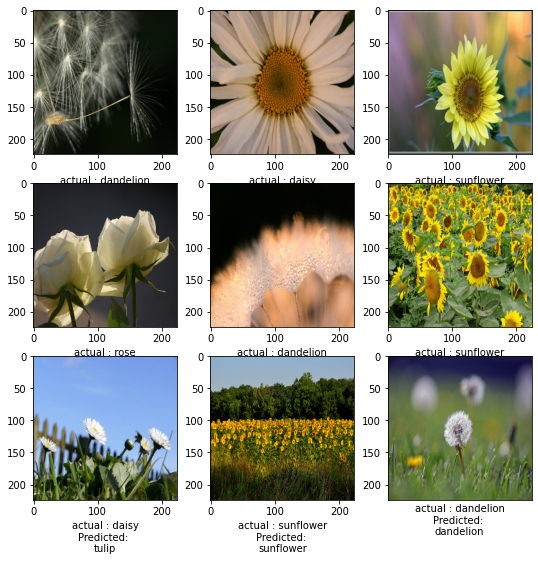

In [19]:
# Prediction
prediction = model.predict(X_test)

plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i])
  
  plt.xlabel('actual : '+categories[y_test[i]]+'\n'+'Predicted: \n'+
             categories[np.argmax(prediction[i])])
  print('\n')
plt.xticks([])

plt.show()